# data ingestion

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

In [2]:
df=pd.read_csv("TSLA.csv",index_col="Date")

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [4]:
# univariate analysis

In [5]:
stock_data=df[["Close"]]

In [6]:
type(stock_data.index)

pandas.core.indexes.base.Index

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2956 non-null   float64
dtypes: float64(1)
memory usage: 46.2+ KB


In [8]:
stock_data.index=pd.to_datetime(stock_data.index)

In [9]:
type(stock_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

# EDA

In [10]:
stock_data.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


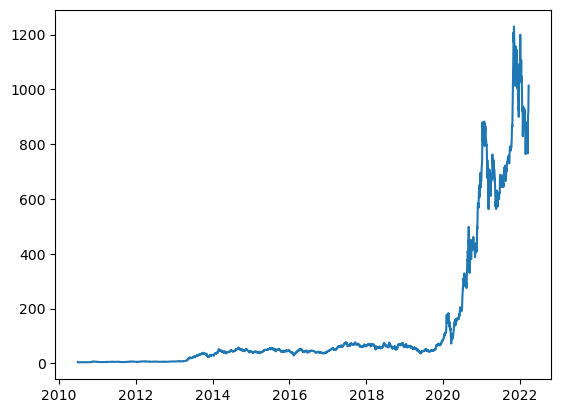

In [11]:
plt.plot(stock_data)

(array([2435.,   86.,   33.,   64.,   36.,  130.,   74.,   41.,   42.,
          15.]),
 array([   3.16     ,  125.8350034,  248.5100068,  371.1850102,
         493.8600136,  616.535017 ,  739.2100204,  861.8850238,
         984.5600272, 1107.2350306, 1229.910034 ]),
 <BarContainer object of 10 artists>)

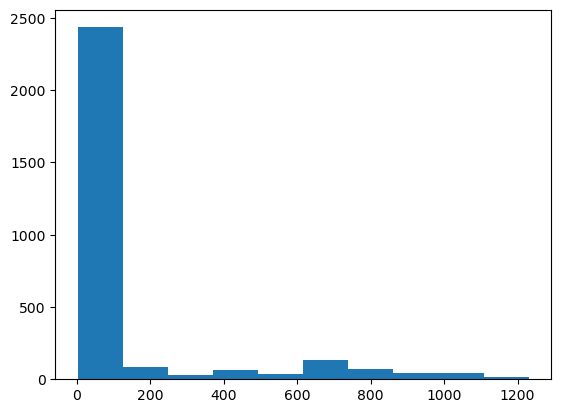

In [12]:
plt.hist(stock_data.Close)

In [13]:
import seaborn as sns

/tmp/ipykernel_4893/3290644508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<AxesSubplot: xlabel='Close', ylabel='Density'>

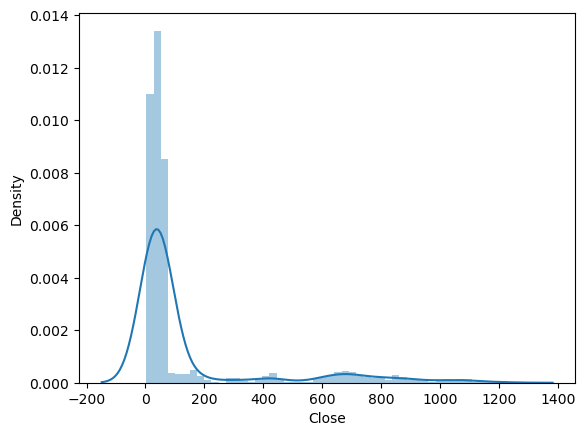

In [14]:
sns.distplot(stock_data.Close)

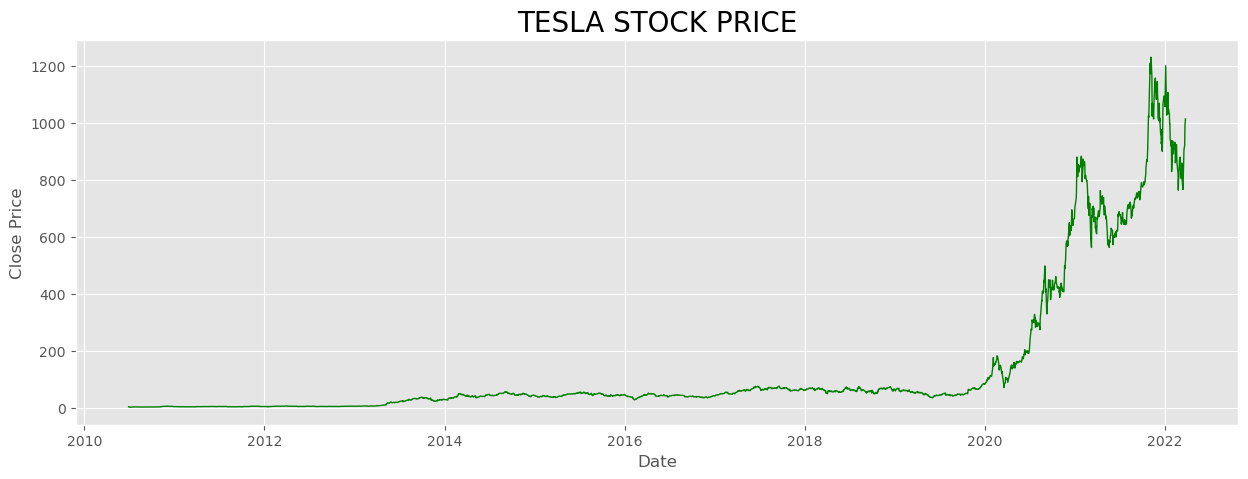

In [15]:
#plotting stock price
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.title("TESLA STOCK PRICE",fontsize=20)
plt.xlabel("Date")
plt.xticks(fontsize=10)
plt.ylabel("Close Price")
plt.xticks(fontsize=10)
plt.grid(True)
plt.plot(stock_data.Close,linewidth=1.0,color="green")
plt.show()

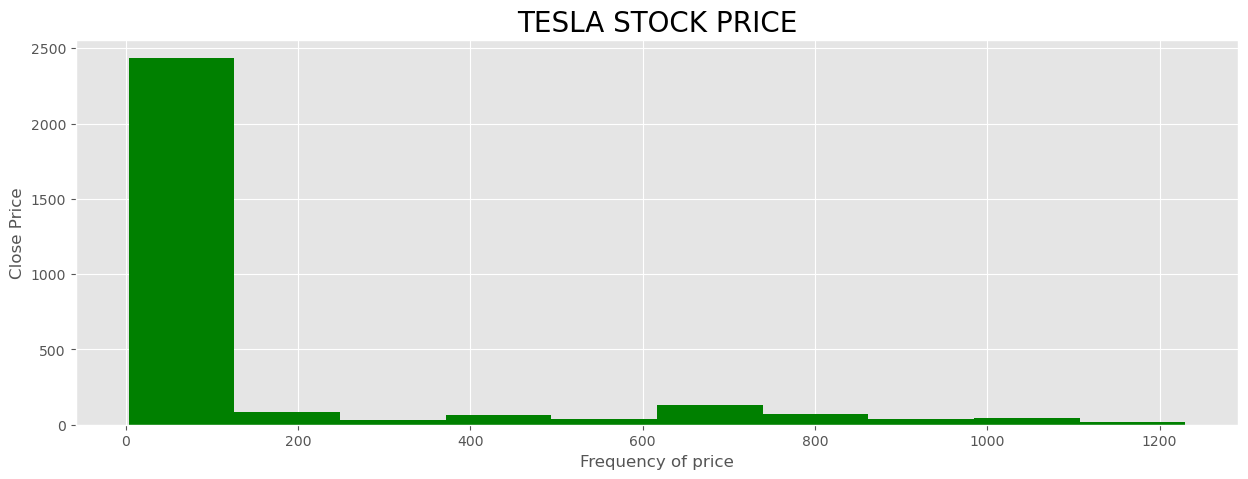

In [16]:
#plotting hist plot
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.title("TESLA STOCK PRICE",fontsize=20)
plt.xlabel("Frequency of price")
plt.xticks(fontsize=10)
plt.ylabel("Close Price")
plt.xticks(fontsize=10)
plt.grid(True)
plt.hist(stock_data.Close,linewidth=1.0,color="green")
plt.show()

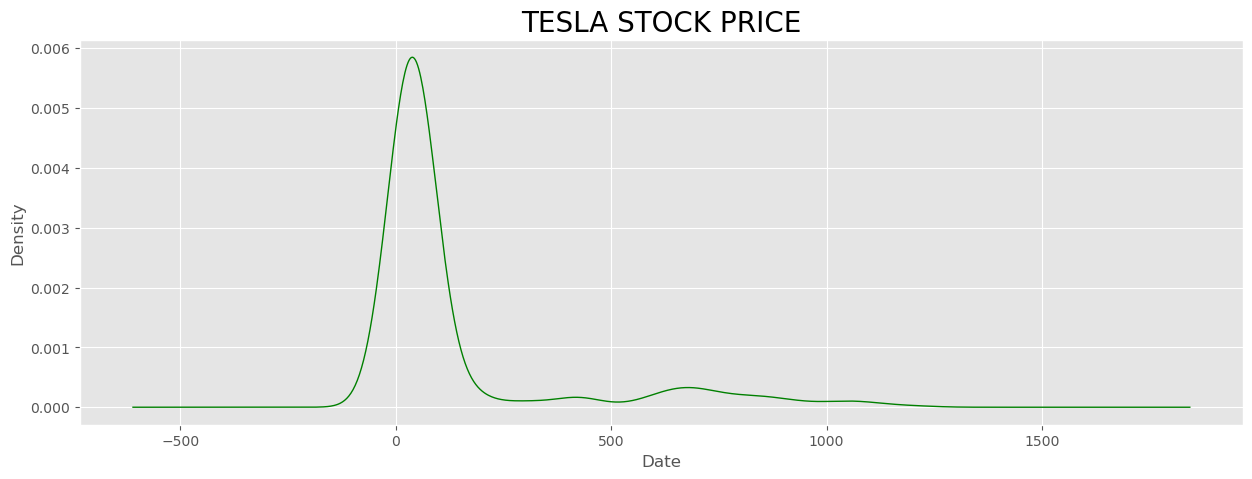

In [17]:
#plotting kde or distplot
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.title("TESLA STOCK PRICE",fontsize=20)
plt.xlabel("Date")
plt.xticks(fontsize=10)
plt.ylabel("Close Price")
plt.xticks(fontsize=10)
plt.grid(True)
stock_data.Close.plot(kind="kde",linewidth=1.0,color="green")
plt.show()

In [18]:
#creating window in timeseries(sommthinf ke liye taaki data se kaafi insights nikal saakte hai)
window_mean=stock_data['Close'].rolling(window=10).mean()
window_std=stock_data['Close'].rolling(window=10).std()

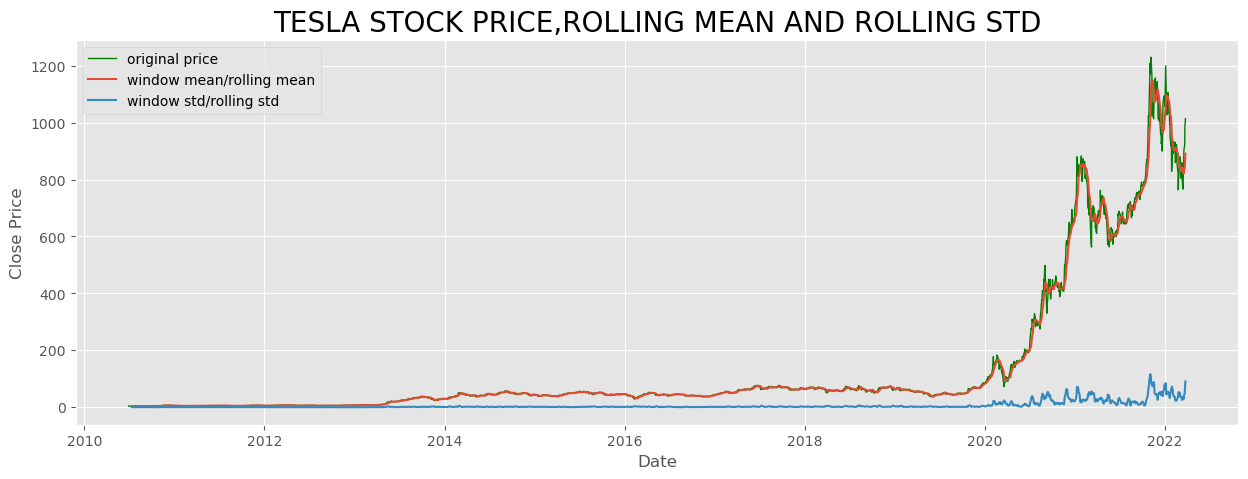

In [19]:
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.title("TESLA STOCK PRICE,ROLLING MEAN AND ROLLING STD",fontsize=20)
plt.xlabel("Date")
plt.xticks(fontsize=10)
plt.ylabel("Close Price")
plt.xticks(fontsize=10)
plt.grid(True)
plt.plot(stock_data.Close,linewidth=1.0,color="green",label="original price")
plt.plot(window_mean,label="window mean/rolling mean")
plt.plot(window_std,label="window std/rolling std")
plt.legend(loc='best',fontsize=10)
plt.show()

In [20]:
#test for stationary(ADF=augmented dickey fuller test)
from statsmodels.tsa.stattools import adfuller
adf=adfuller(stock_data.Close)

In [21]:
adf

(1.4239415939225961,
 0.9972202364261444,
 28,
 2927,
 {'1%': -3.4325860929804404,
  '5%': -2.8625279573644873,
  '10%': -2.5672959172141048},
 22241.284192789386)

In [22]:
pd.Series(adf[0:4],index=["test stats","p value","critical value","lag length"])

test stats           1.423942
p value              0.997220
critical value      28.000000
lag length        2927.000000
dtype: float64

h0:null hypothesis data is not stationary

h1:hypothesis is stationary

if p>0.05 : data is stationary

elif p<0.05 : data is not statinary

<AxesSubplot: >

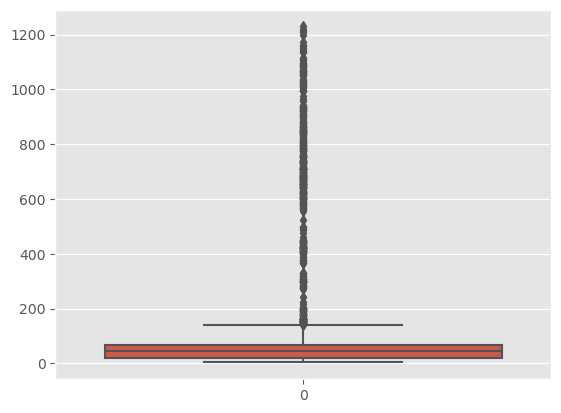

In [23]:
# outlier is prewsent or not
sns.boxplot(stock_data.Close)

In [24]:

# Calculate the IQR
iqr = np.diff(np.quantile(stock_data, [.25, .75]))
Q1,Q3=np.quantile(stock_data,[.25,.75])
# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * iqr
lower_bound = Q1 - 1.5 * iqr

# Remove outliers
stock_data_outlier= stock_data[(stock_data > lower_bound) & (stock_data < upper_bound)]

<AxesSubplot: >

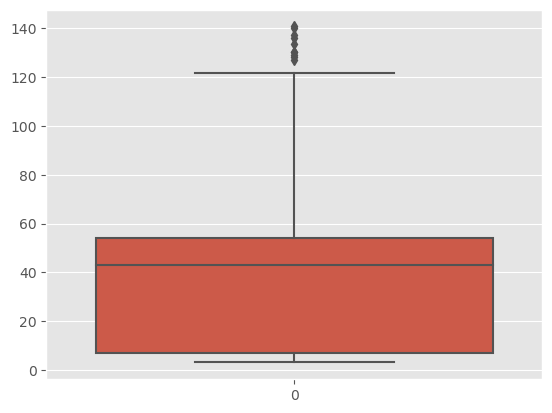

In [25]:
sns.boxplot(stock_data_outlier.Close)

In [26]:
stock_data_outlier.describe()
stock_data_outlier.dropna(inplace=True)

In [27]:
# decomposee
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data_outlier[['Close']],period=7)

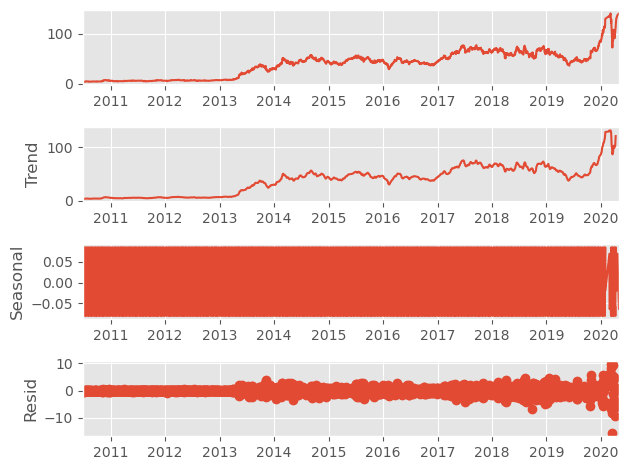

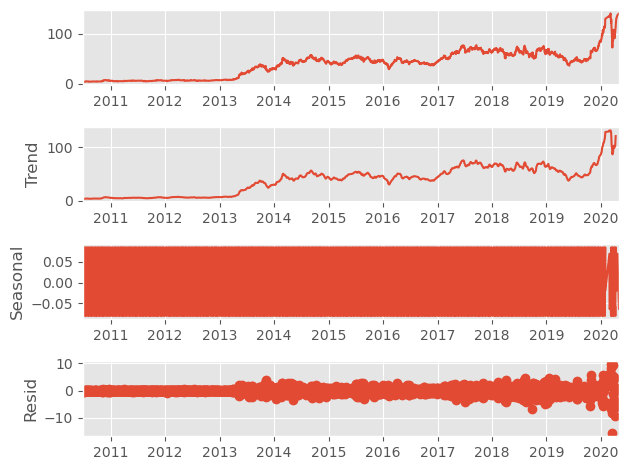

In [28]:
result.plot()

In [29]:
result.seasonal

Date
2010-06-29    0.069843
2010-06-30   -0.063602
2010-07-01   -0.058137
2010-07-02   -0.080404
2010-07-06    0.066392
                ...   
2020-04-08    0.066392
2020-04-09    0.085341
2020-04-13   -0.019434
2020-04-21    0.069843
2020-05-01   -0.063602
Name: seasonal, Length: 2445, dtype: float64

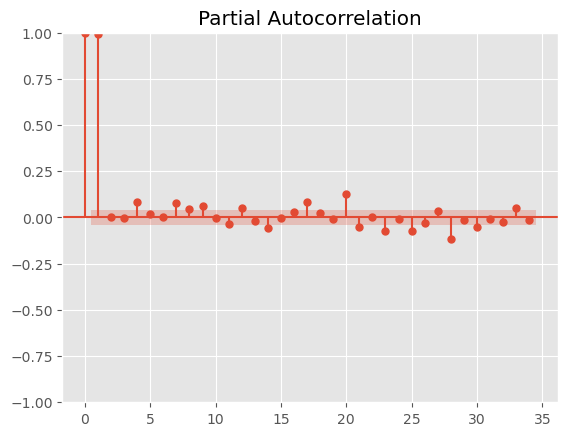

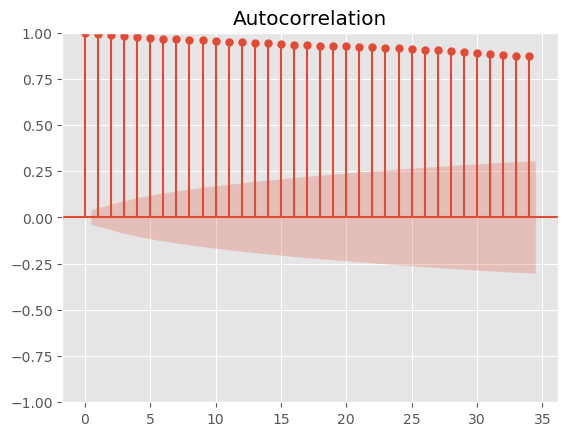

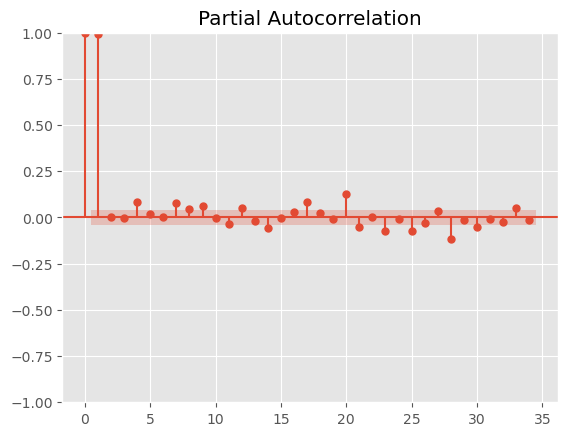

In [30]:
# check for acf and pacf
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
plot_acf(stock_data_outlier.Close)
plot_pacf(stock_data_outlier.Close)

# pre processing

In [31]:
df_close=stock_data_outlier['Close']

In [32]:
df_close

Date
2010-06-29      4.778000
2010-06-30      4.766000
2010-07-01      4.392000
2010-07-02      3.840000
2010-07-06      3.222000
                 ...    
2020-04-08    109.767998
2020-04-09    114.599998
2020-04-13    130.190002
2020-04-21    137.343994
2020-05-01    140.264008
Name: Close, Length: 2445, dtype: float64

In [33]:
# stationary bnana sikhe??
df_close=df_close.diff()
df_close.dropna()

Date
2010-06-30    -0.012000
2010-07-01    -0.374000
2010-07-02    -0.552000
2010-07-06    -0.618000
2010-07-07    -0.062000
                ...    
2020-04-08     0.678002
2020-04-09     4.832000
2020-04-13    15.590004
2020-04-21     7.153992
2020-05-01     2.920014
Name: Close, Length: 2444, dtype: float64

In [34]:
#checking the stationary is or not??
window_mean=df_close.rolling(window=12).mean()
window_std=df_close.rolling(window=12).std()

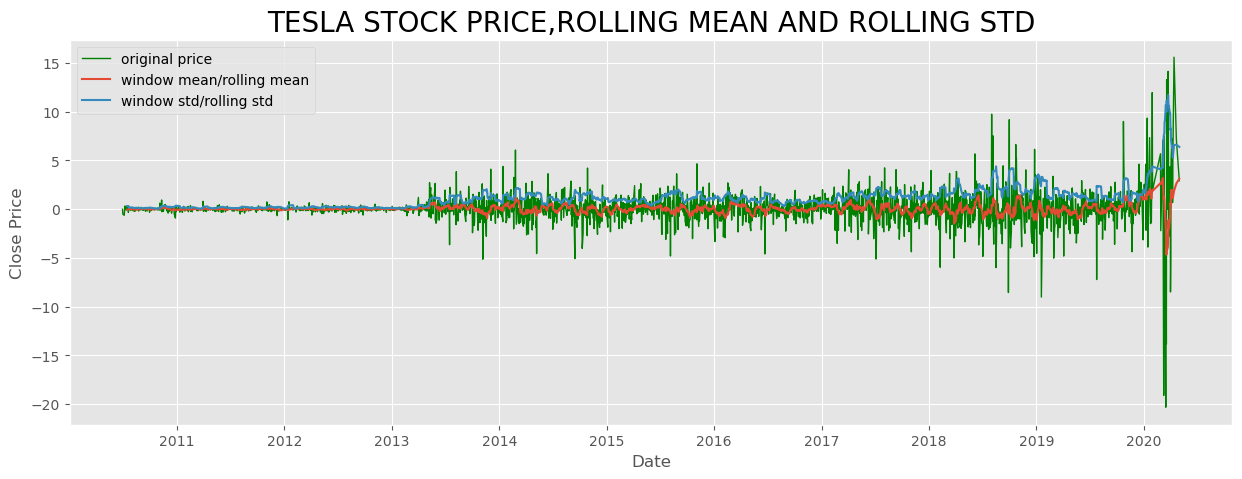

In [35]:
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.title("TESLA STOCK PRICE,ROLLING MEAN AND ROLLING STD",fontsize=20)
plt.xlabel("Date")
plt.xticks(fontsize=10)
plt.ylabel("Close Price")
plt.xticks(fontsize=10)
plt.grid(True)
plt.plot(df_close,linewidth=1.0,color="green",label="original price")
plt.plot(window_mean,label="window mean/rolling mean")
plt.plot(window_std,label="window std/rolling std")
plt.legend(loc='best',fontsize=10)
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(df_close.dropna())
pd.Series(adf[0:4],index=["test stats","p value","critical value","lag length"])

test stats       -1.013858e+01
p value           8.539154e-18
critical value    2.700000e+01
lag length        2.416000e+03
dtype: float64

In [37]:
#train test
df_close.dropna(inplace=True)
train=df_close[0:-160]
test=df_close[-160:]

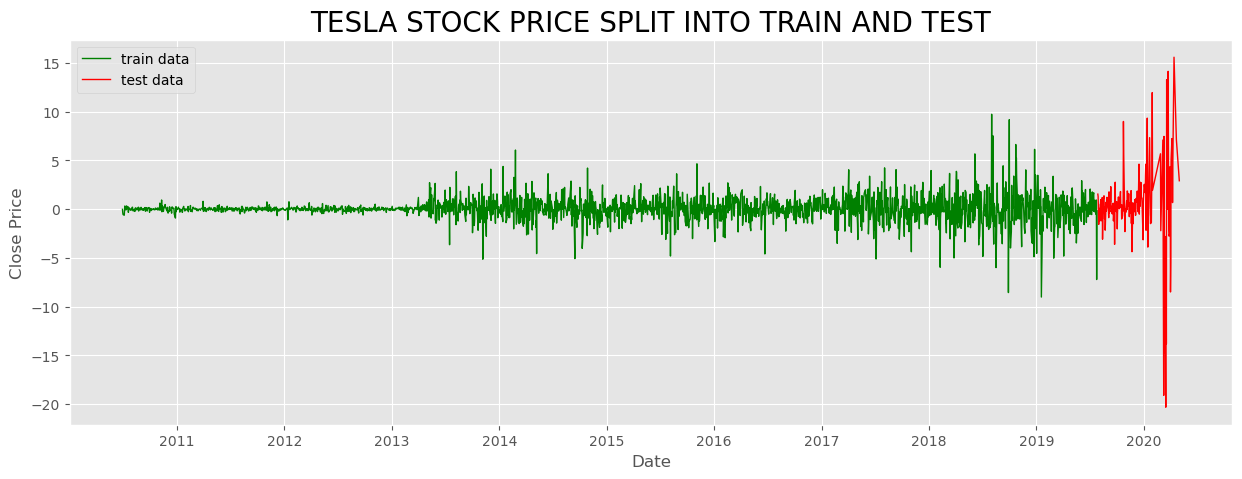

In [38]:
#plottinng
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.title("TESLA STOCK PRICE SPLIT INTO TRAIN AND TEST",fontsize=20)
plt.xlabel("Date")
plt.xticks(fontsize=10)
plt.ylabel("Close Price")
plt.xticks(fontsize=10)
plt.grid(True)
plt.plot(train,linewidth=1.0,color="green",label="train data")
plt.plot(test,linewidth=1.0,color='red',label='test data')
plt.legend(loc='best',fontsize=10)
plt.show()

# model building

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

history=[x for x in train]

model=ARIMA(history,order=(1,1,1))

model=model.fit()

model.summary()

model.forecast()[0]

test[0]

mean_squared_error([test[0]],model.forecast())


In [40]:
# selecting order or values for a,d,q
# evaluate parameters
def train_arima_model_rmse(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [41]:
# evaluating diff combination arima_order
def evaluate_model(dataset,test,p,d,q):
    datset=dataset.astype('float32')
    best_score=float('inf')
    best_order= None
    for i in p :
        for j in d:
            for k in q:
                order=(i,j,k)
                try:
                    rmse=train_arima_model_rmse(dataset,test,order)
                    if rmse<best_score:
                        best_score=rmse
                        best_order=order
                        print('ARIMA order %s and RMSE %0.3f',(best_order,best_score))
                except:
                    
                        continue
    print('best ARIMA order %s and best RMSE %0.3f',(best_order,best_score))


In [42]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 1)
d_values = range(0, 2)
q_values = range(0, 1)
evaluate_model(train, test, p_values, d_values, q_values)

ARIMA order %s and RMSE %0.3f ((0, 0, 0), 4.369048212240236)
best ARIMA order %s and best RMSE %0.3f ((0, 0, 0), 4.369048212240236)


In [43]:
history = [x for x in train]
predictions = list()
conf_list = list()
for t in range(len(test)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test, predictions)))

RMSE of ARIMA Model: 4.352480979719803


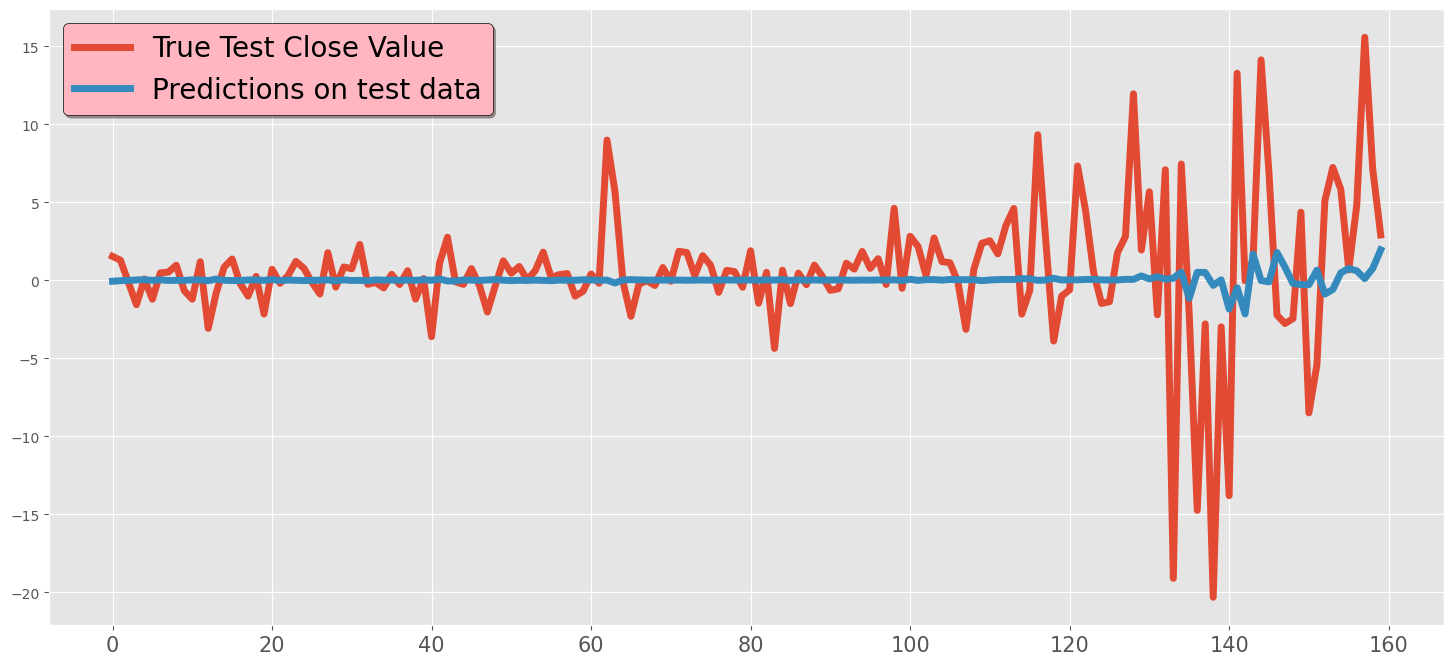

In [44]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test)),test, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [46]:
fc_series = pd.Series(predictions, index=test.index)

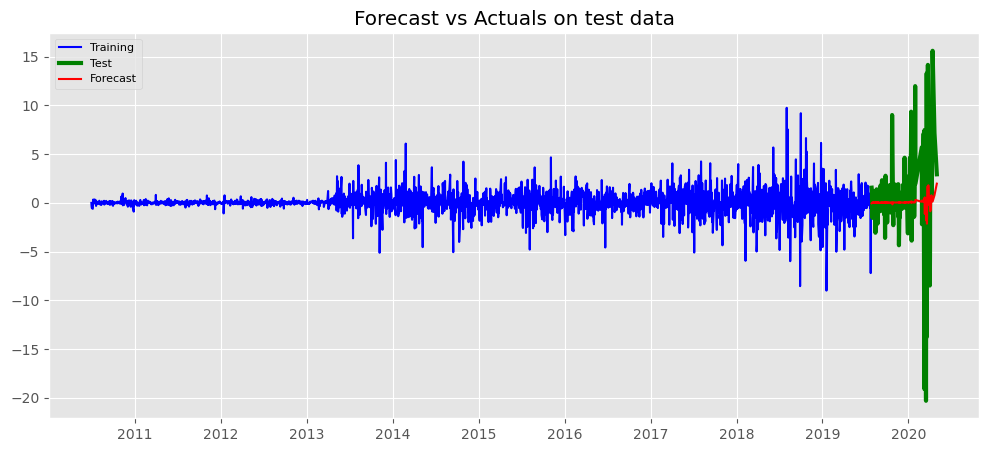

In [48]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training', color = 'blue')
plt.plot(test, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()